In [2]:
import pandas as pd
import numpy as np

# Creating Dataset

In [3]:
# Set random seed for reproducibility
np.random.seed(42)

In [4]:
# Define simulation parameters
n_users = 10000
conversion_rate_a = 0.08  # Offer A: Free eBook
conversion_rate_b = 0.10  # Offer B: 15% Discount

In [5]:
# Simulate user responses (1 = clicked/redeemed, 0 = ignored)
group_a = np.random.binomial(1, conversion_rate_a, n_users)
group_b = np.random.binomial(1, conversion_rate_b, n_users)

# Create a DataFrame to hold the results
df_ab_test = pd.DataFrame({
    'group': ['A'] * n_users + ['B'] * n_users,
    'engaged': np.concatenate([group_a, group_b])
})

In [7]:
df_ab_test.to_csv(r"C:\Users\MehakGanju\Documents\Repositories\Personal\AB Test\data\loyalty_ab_test_data.csv")

# Generating Visualization

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Set visual style
sns.set(style="whitegrid")

In [10]:
# Calculate average engagement per group
conversion_rates = df_ab_test.groupby('group')['engaged'].mean().reset_index()
conversion_rates.columns = ['Group', 'Conversion Rate']

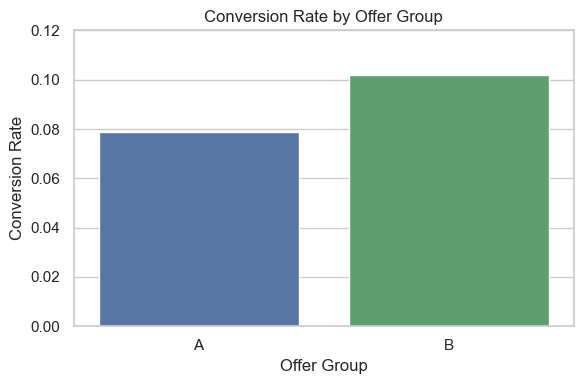

In [ ]:
# Create bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x='Group', y='Conversion Rate', data=conversion_rates, palette=['#4c72b0', '#55a868'])
plt.title('Conversion Rate by Offer Group')
plt.ylim(0, 0.12)  # Adjust based on your data
plt.ylabel('Conversion Rate')
plt.xlabel('Offer Group')
plt.tight_layout()
plt.savefig(r"C:\Users\MehakGanju\Documents\Repositories\Personal\AB Test\charts\conversion_rate_plot.png") 

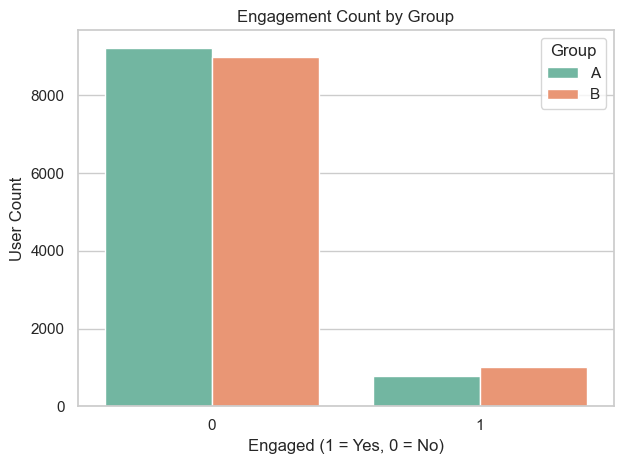

In [20]:
sns.countplot(data=df_ab_test, x='engaged', hue='group', palette='Set2')
plt.title('Engagement Count by Group')
plt.xlabel('Engaged (1 = Yes, 0 = No)')
plt.ylabel('User Count')
plt.legend(title='Group')
plt.tight_layout()
plt.savefig(r"C:\Users\MehakGanju\Documents\Repositories\Personal\AB Test\charts\engagement_count_plot.png") 
plt.show()

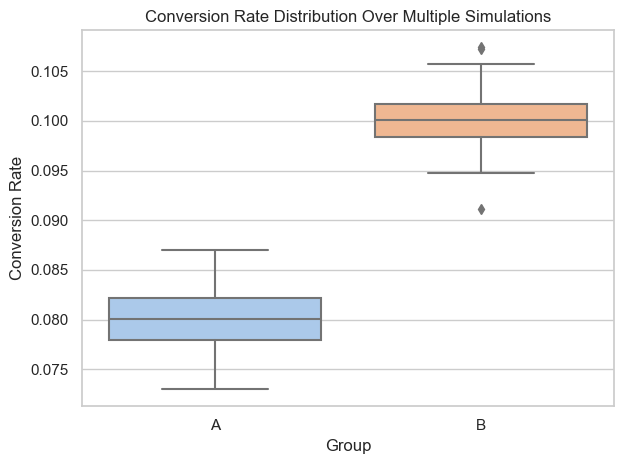

In [21]:
# Example: Simulate 100 tests for each group
simulations = []
for _ in range(100):
    group_a_sim = np.random.binomial(1, 0.08, 10000)
    group_b_sim = np.random.binomial(1, 0.10, 10000)
    simulations.append({'Group': 'A', 'Conversion Rate': group_a_sim.mean()})
    simulations.append({'Group': 'B', 'Conversion Rate': group_b_sim.mean()})

df_sim = pd.DataFrame(simulations)

sns.boxplot(data=df_sim, x='Group', y='Conversion Rate', palette='pastel')
plt.title('Conversion Rate Distribution Over Multiple Simulations')
plt.tight_layout()
plt.savefig(r"C:\Users\MehakGanju\Documents\Repositories\Personal\AB Test\charts\conversion_rate_dist_plot.png") 
plt.show()

# Run T-test

In [12]:
from scipy.stats import ttest_ind

In [13]:
# Split the data into groups A and B
group_a = df_ab_test[df_ab_test['group'] == 'A']['engaged']
group_b = df_ab_test[df_ab_test['group'] == 'B']['engaged']


In [14]:
# Perform independent t-test (assumes equal variance by default)
t_stat, p_value = ttest_ind(group_a, group_b)

In [15]:
# Print results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: -5.8009
P-value: 0.0000


In [16]:
# Interpretation
alpha = 0.05
if p_value < alpha:
    print("✅ Result is statistically significant: Reject the null hypothesis.")
else:
    print("❌ Result is not statistically significant: Fail to reject the null hypothesis.")

✅ Result is statistically significant: Reject the null hypothesis.


## ✅ Final Interpretation & Recommendation

The A/B test simulation revealed a statistically significant difference in engagement rates between the two loyalty offers:

- **Offer A (Free eBook):** ~8% conversion rate  
- **Offer B (15% Discount):** ~10% conversion rate  
- **p-value < 0.05**, indicating the result is statistically significant

This means we **reject the null hypothesis** and conclude that the type of offer **does** influence user engagement. More specifically, the **15% discount** offer led to a **2% absolute increase** in engagement compared to the free eBook.

---

### 📢 Business Recommendation

> Based on the results, we recommend rolling out **Offer B (15% discount)** more broadly across the loyalty program. The data suggests that customers are more likely to engage with monetary incentives than informational perks. To further validate the finding, consider running a real-world A/B test or segmenting by customer demographics to refine targeting.
